In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats
import os


os.chdir("../Projet-CMI-Calcul-Num")

# Election présidentielle 2022 et variables socio-démographiques dans les Hauts-de-Seine

données :

- Données des élections présidentielles françaises de 2022.
- Variables socio demographiques par commune française
- Variables socio démographiques par département français

In [53]:
# Chargement des données

pres22 = pd.read_csv("../Projet-CMI-Calcul-Num/data/pres2022comm.csv", dtype={'codecommune': str, 'dep': str})
socio_demo = pd.read_csv("../Projet-CMI-Calcul-Num/data/var_socio_demo.csv", dtype={'codecommune': str, 'dep': str})
socio_dep = pd.read_csv("../Projet-CMI-Calcul-Num/data/var_socio_dep.csv", dtype={'codecommune': str, 'dep': str})



### Partie 1. Statistiques descriptives sur le département

In [36]:
socio_demo['dep'] = socio_demo['codecommune'].str[:2]  # On prend les 2 premiers caractères de 'codecommune'

# Filtrer les données pour le département 92 (Hauts-de-Seine)
socio_demo_92 = socio_demo[socio_demo['dep'] == '92']

# Afficher les premières lignes pour vérifier
print(socio_demo_92.head())

      codecommune  agri2022  indp2022  cadr2022  pint2022  empl2022  ouvr2022  \
37675       92002       7.0     886.0   10612.0    4932.0    3936.0    1213.0   
37676       92004       0.0    2019.0   16355.0    9079.0    7091.0    2684.0   
37677       92007       0.0     319.0    4126.0    3692.0    5168.0    2165.0   
37678       92009       0.0     529.0    5198.0    2602.0    1496.0     743.0   
37679       92012       0.0    3390.0   29835.0   11933.0    6421.0    2030.0   

       chom2022  aind2022  aica2022  ...  prop0142022  prop15392022  \
37675    1181.0     893.0   11505.0  ...     0.183927      0.298273   
37676    2849.0    2019.0   18374.0  ...     0.202484      0.353691   
37677    1525.0     319.0    4445.0  ...     0.223305      0.360327   
37678     421.0     529.0    5727.0  ...     0.180949      0.296967   
37679    3781.0    3390.0   33225.0  ...     0.170499      0.372423   

       prop40592022  prop60p2022  perpropf2022  perage2022  perprop0142022  \
37675   

In [48]:
# Statistiques descriptives pour le département 92
# Sélection des colonnes pertinentes pour les revenus, l'âge, le chômage et les niveaux de diplôme
columns_of_interest = ['revmoy2022', 'age2022', 'revtot2022', 'revmoyfoy2022', 'revmoyadu2022', 'pchom2022', 'pbac2022', 'psup2022']

# Statistiques descriptives du 92
stats_92 = socio_demo_92[columns_of_interest].describe()

# Afficher les statistiques descriptives pour le département 92
print("Statistiques descriptives pour le département 92 (Hauts-de-Seine):")
print(stats_92)

# Calculer les statistiques pour l'ensemble de la France (sans filtrer par département)
stats_france = socio_demo[columns_of_interest].describe()

# Afficher les statistiques pour la France
print("\nStatistiques descriptives pour l'ensemble de la France:")
print(stats_france)

# Comparaison entre les statistiques du 92 et celles de la France
# Comparer le revenu moyen du 92 avec celui de la France
mean_92 = socio_demo_92['revmoy2022'].mean()
mean_france = socio_demo['revmoy2022'].mean()

print("\nComparaison du revenu moyen:")
print(f"Revenu moyen du 92 : {mean_92:.2f}")
print(f"Revenu moyen de la France : {mean_france:.2f}")

# Comparer l'âge moyen du 92 avec celui de la France
mean_age_92 = socio_demo_92['age2022'].mean()
mean_age_france = socio_demo['age2022'].mean()

print(f"\nÂge moyen du 92 : {mean_age_92:.2f}")
print(f"Âge moyen de la France : {mean_age_france:.2f}")

# Comparaison des proportions : taux de chômage, proportion sans diplôme, avec bac, et études supérieures
mean_pchom_92 = socio_demo_92['pchom2022'].mean()
mean_pchom_france = socio_demo['pchom2022'].mean()

# Calculer la proportion de non-diplômés pour l'ensemble de la France
socio_demo['nodip_proportion'] = socio_demo['nodip2022'] / socio_demo['pop2022'] * 100
mean_nodip_france = socio_demo['nodip_proportion'].mean()

mean_pbaccalaureate_92 = socio_demo_92['pbac2022'].mean()
mean_pbaccalaureate_france = socio_demo['pbac2022'].mean()

mean_psup_92 = socio_demo_92['psup2022'].mean()
mean_psup_france = socio_demo['psup2022'].mean()

print("\nComparaison des proportions de chômeurs et niveaux de diplôme:")
print(f"Taux de chômage du 92 : {mean_pchom_92:.2f}%")
print(f"Taux de chômage de la France : {mean_pchom_france:.2f}%")

print(f"\nProportion de diplômés du bac du 92 : {mean_pbaccalaureate_92:.2f}")
print(f"Proportion de diplômés du bac de la France : {mean_pbaccalaureate_france:.2f}")

print(f"\nProportion de diplômés d'études supérieures du 92 : {mean_psup_92:.2f}")
print(f"Proportion de diplômés d'études supérieures de la France : {mean_psup_france:.2f}")


Statistiques descriptives pour le département 92 (Hauts-de-Seine):
         revmoy2022    age2022  revtot2022  revmoyfoy2022  revmoyadu2022  \
count     36.000000  36.000000   36.000000      36.000000      36.000000   
mean   31829.392556  39.341983    0.001105   56906.408444   42406.016389   
std    12457.508900   2.037881    0.000856   23462.478988   15972.159715   
min    12115.794000  34.678322    0.000078   23537.146000   17535.859000   
25%    24036.871750  38.030949    0.000544   44458.007250   32655.327000   
50%    30107.075500  39.290447    0.000762   53098.510000   39883.799000   
75%    36560.942250  40.555796    0.001398   62644.303500   48467.915750   
max    79357.602000  43.384209    0.003898  133021.660000  101324.200000   

       pchom2022   pbac2022   psup2022  
count  36.000000  36.000000  36.000000  
mean    0.074145   0.715922   0.590661  
std     0.019942   0.094854   0.113083  
min     0.039837   0.432541   0.243788  
25%     0.060496   0.684748   0.542584  
50

C:\Users\mailm\AppData\Local\Temp\ipykernel_22932\1650029417.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, 0].set_xticklabels(['92', 'France'])
C:\Users\mailm\AppData\Local\Temp\ipykernel_22932\1650029417.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, 1].set_xticklabels(['92', 'France'])


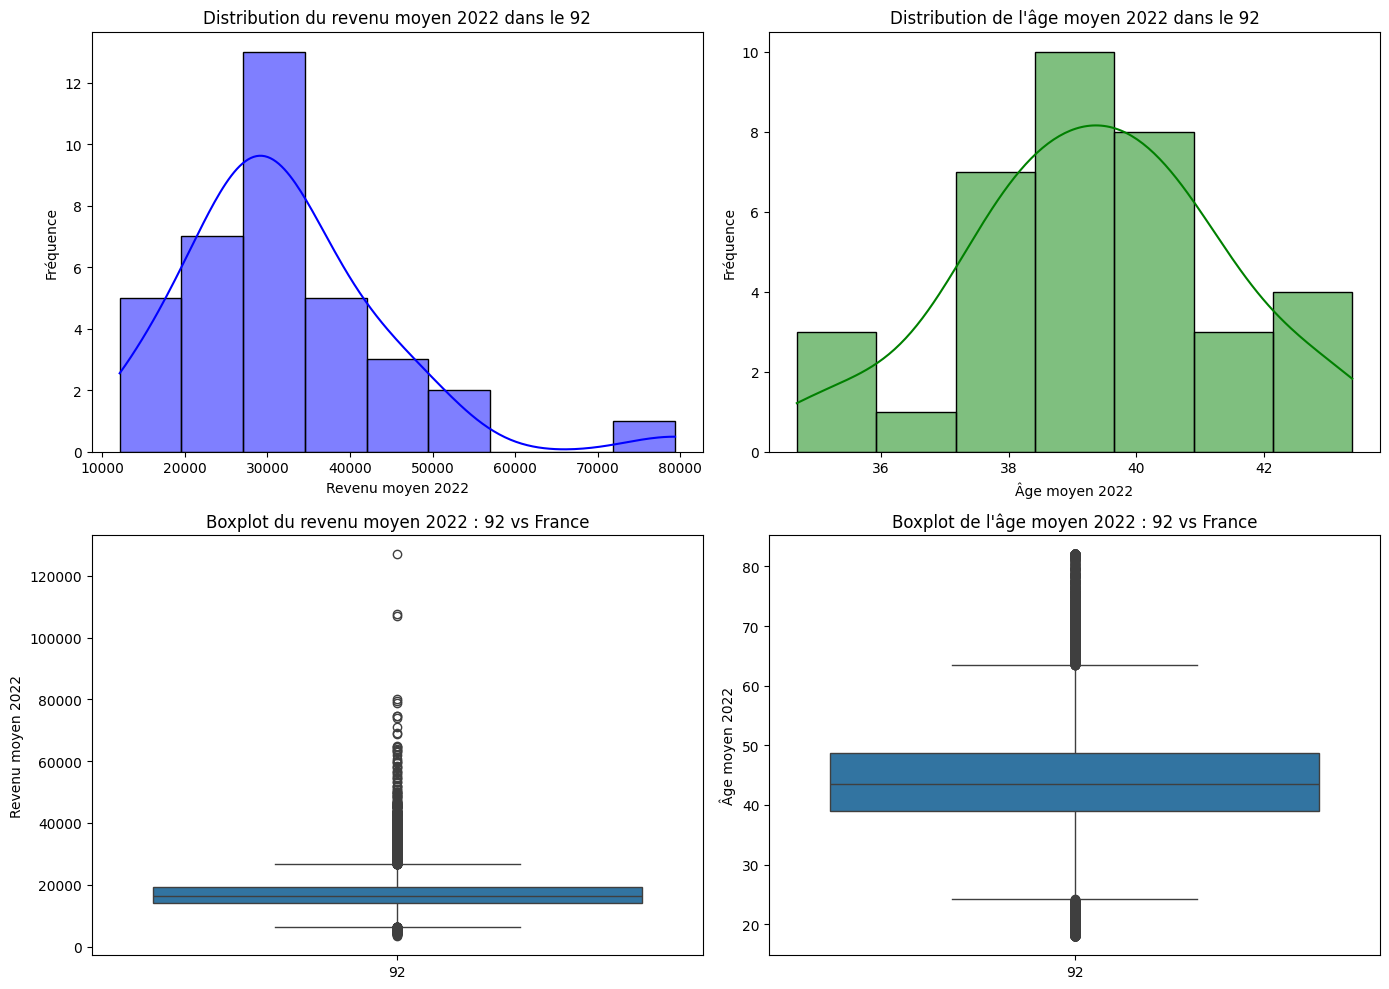

Revenu moyen du 92 : 31829.39
Revenu moyen de la France : 17051.48
Âge moyen du 92 : 39.34
Âge moyen de la France : 44.27


In [49]:
# graphiques



# Comparaison des moyennes pour la France et le département 92
mean_92 = socio_demo_92['revmoy2022'].mean()
mean_france = socio_demo['revmoy2022'].mean()
mean_age_92 = socio_demo_92['age2022'].mean()
mean_age_france = socio_demo['age2022'].mean()

# Création des graphiques
fig, axes = plt.subplots(2, 2, figsize=(14, 10))  # Définir correctement les axes

# 1. Histogramme du revenu moyen 2022
sns.histplot(socio_demo_92['revmoy2022'], kde=True, color='blue', ax=axes[0, 0])
axes[0, 0].set_title('Distribution du revenu moyen 2022 dans le 92')
axes[0, 0].set_xlabel('Revenu moyen 2022')
axes[0, 0].set_ylabel('Fréquence')

# 2. Histogramme de l'âge moyen 2022
sns.histplot(socio_demo_92['age2022'], kde=True, color='green', ax=axes[0, 1])
axes[0, 1].set_title('Distribution de l\'âge moyen 2022 dans le 92')
axes[0, 1].set_xlabel('Âge moyen 2022')
axes[0, 1].set_ylabel('Fréquence')

# 3. Boxplot comparatif du revenu moyen 2022 (92 vs France)
sns.boxplot(data=[socio_demo_92['revmoy2022'], socio_demo['revmoy2022']], ax=axes[1, 0])
axes[1, 0].set_xticklabels(['92', 'France'])
axes[1, 0].set_title('Boxplot du revenu moyen 2022 : 92 vs France')
axes[1, 0].set_ylabel('Revenu moyen 2022')

# 4. Boxplot comparatif de l'âge moyen 2022 (92 vs France)
sns.boxplot(data=[socio_demo_92['age2022'], socio_demo['age2022']], ax=axes[1, 1])
axes[1, 1].set_xticklabels(['92', 'France'])
axes[1, 1].set_title('Boxplot de l\'âge moyen 2022 : 92 vs France')
axes[1, 1].set_ylabel('Âge moyen 2022')

# Ajuster l'espacement entre les graphiques
plt.tight_layout()

# Afficher les graphiques
plt.show()

# Afficher les moyennes pour comparer
print(f"Revenu moyen du 92 : {mean_92:.2f}")
print(f"Revenu moyen de la France : {mean_france:.2f}")
print(f"Âge moyen du 92 : {mean_age_92:.2f}")
print(f"Âge moyen de la France : {mean_age_france:.2f}")

### Partie 2. Statistiques Descriptives

statistiques descriptives sur les variables électorales du département : comment se répartissent les communes en matière de vote.

In [57]:
#extraction d'info pour une ou plusieurs communes identifiées
def extraire(df, codes_communes):
    if isinstance(codes_communes, str): 
        codes_communes = [codes_communes]

    result = df[df['codecommune'].isin(codes_communes)]
    return result

extraire(pres22, [78500])

,dep,nomdep,codecommune,nomcommune,inscrits,votants,exprimes,voixARTHAUD,voixPOUTOU,voixROUSSEL,...,ppar,perpar,pparratio,pabs,pblancsnuls,inscritsT2,votantsT2,exprimesT2,pabsT2,pblancsnulsT2
